In [44]:
import pandas as pd
import os

# Define the directory where the CSV files are located
results_dir = "/home/etaylor/results"

# Load each CSV file into a DataFrame
df_anomaly_high = pd.read_csv(os.path.join(results_dir, "anomaly_conditions_high_branching_factor_results.csv"), index_col=0)
df_anomaly = pd.read_csv(os.path.join(results_dir, "anomaly_conditions_results.csv"), index_col=0)
df_normal_high = pd.read_csv(os.path.join(results_dir, "normal_conditions_high_branching_factor_results.csv"), index_col=0)
df_normal = pd.read_csv(os.path.join(results_dir, "normal_conditions_results.csv"), index_col=0)


In [52]:
import matplotlib.pyplot as plt

def plot_results(df, title):
    plt.figure(figsize=(10, 6))
    for branching_factor in df.index:
        plt.plot(df.columns.astype(int), df.loc[branching_factor], label=f'Branching Factor {branching_factor}')
    plt.xlabel('Tree Depth')
    plt.ylabel('Average Nodes Expanded')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


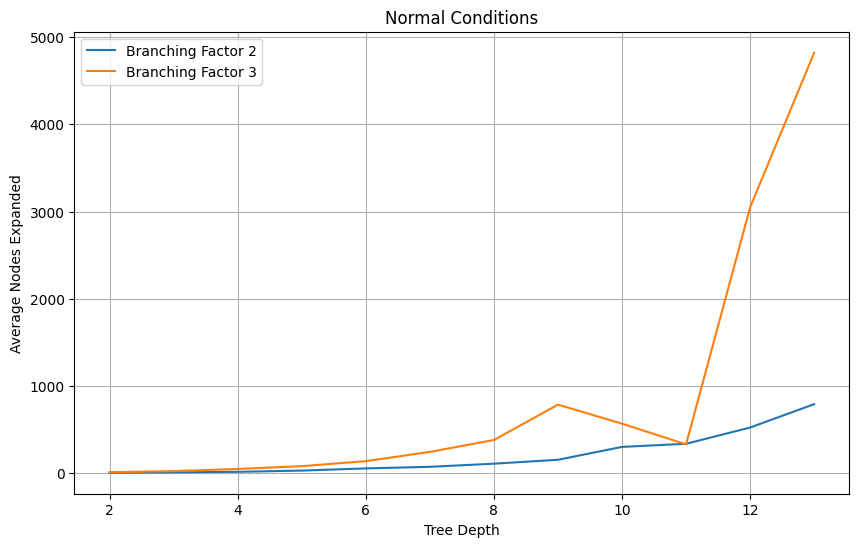

In [55]:
plot_results(df_normal, "Normal Conditions")

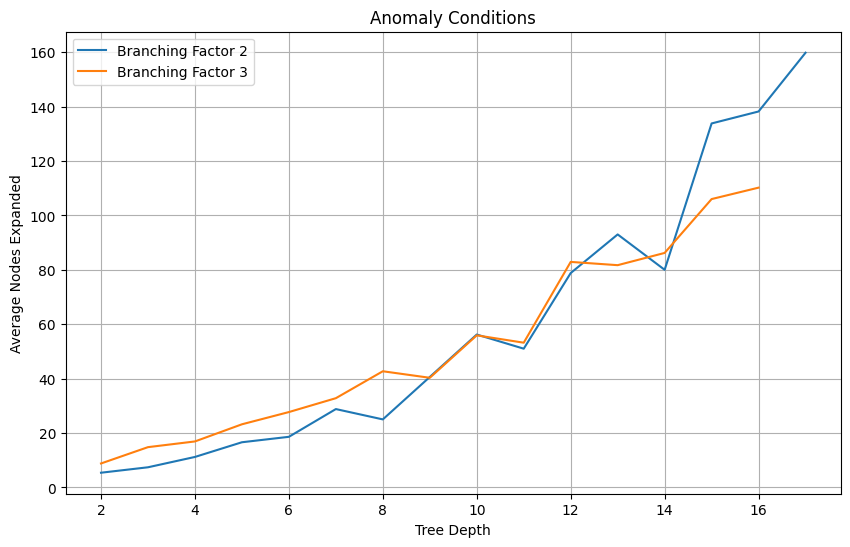

In [51]:
plot_results(df_anomaly, "Anomaly Conditions")

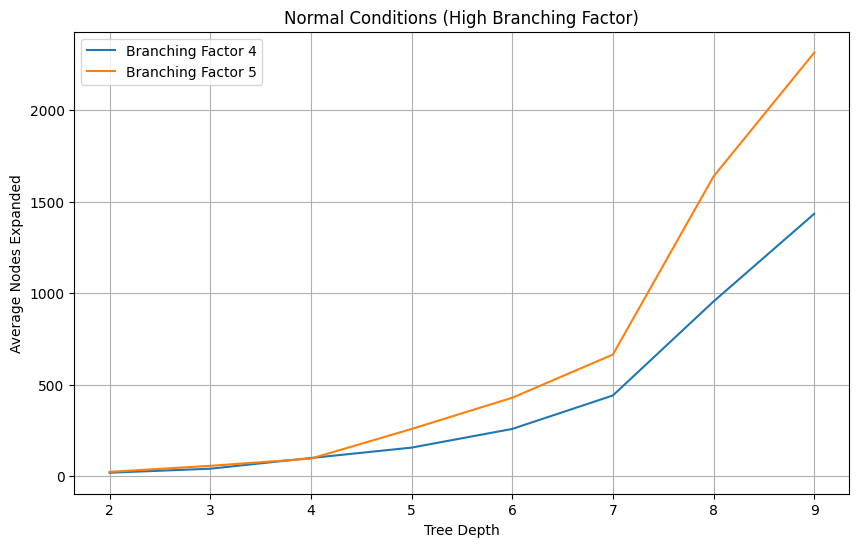

In [53]:
plot_results(df_normal_high, "Normal Conditions (High Branching Factor)")


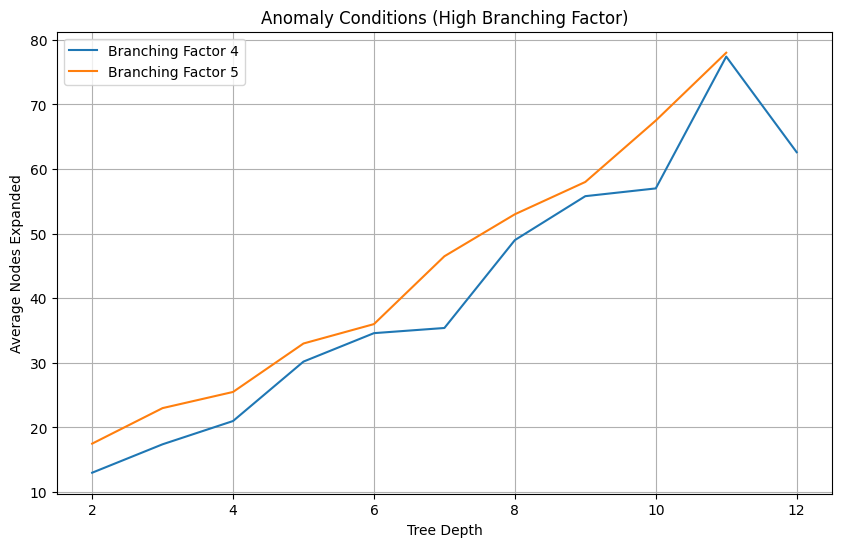

In [54]:
plot_results(df_anomaly_high, "Anomaly Conditions (High Branching Factor)")


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting function for comparing two dataframes
def compare_and_plot(df1, df2, title1, title2, combined_title):
    plt.figure(figsize=(10, 6))
    
    # Plot for df1 (e.g., anomaly)
    for branching_factor in df1.index:
        nodes_expanded = df1.loc[branching_factor].dropna()
        depths = df1.columns[df1.loc[branching_factor].notna()].astype(int)

        # Plot only valid data
        plt.plot(depths, nodes_expanded, label=f'{title1} - Branching Factor {branching_factor}')
    
    # Plot for df2 (e.g., normal)
    for branching_factor in df2.index:
        nodes_expanded = df2.loc[branching_factor].dropna()
        depths = df2.columns[df2.loc[branching_factor].notna()].astype(int)

        # Plot only valid data
        plt.plot(depths, nodes_expanded, linestyle='--', label=f'{title2} - Branching Factor {branching_factor}')
    
    plt.xlabel('Tree Depth')
    plt.ylabel('Average Nodes Expanded')
    plt.title(combined_title)
    plt.legend()
    plt.grid(True)
    plt.show()


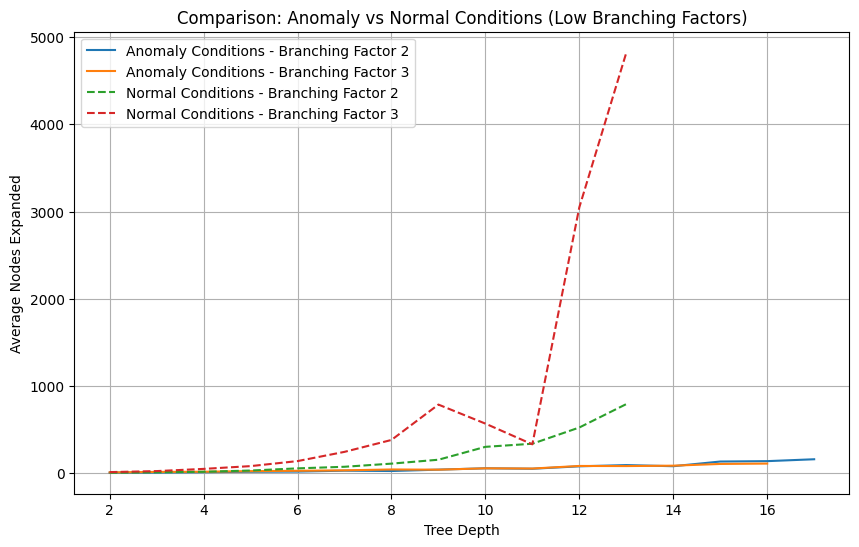

In [49]:
# Define the number of points to plot
n_points = 12

# Compare and plot the results for low branching factors
compare_and_plot(df_anomaly, df_normal, "Anomaly Conditions", "Normal Conditions", "Comparison: Anomaly vs Normal Conditions (Low Branching Factors)")

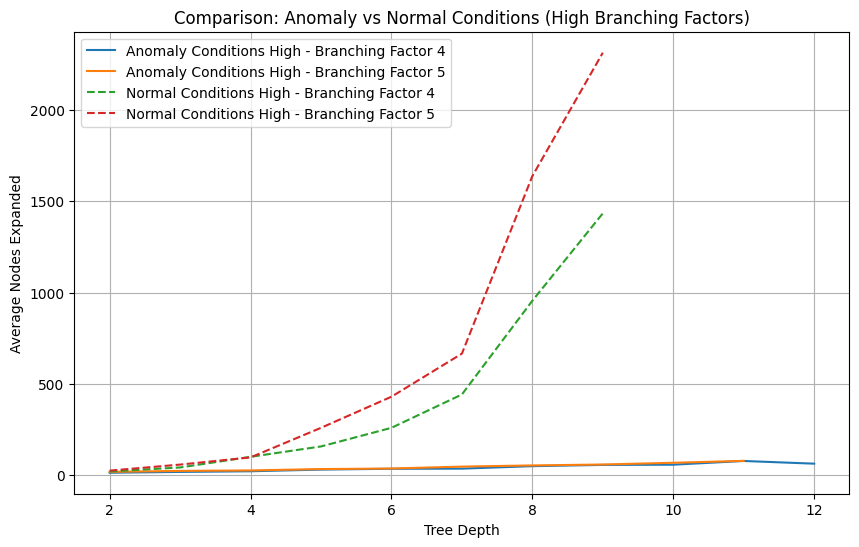

In [48]:
# Define the number of points to plot
n_points = 8

# Compare and plot the results for high branching factors
compare_and_plot(df_anomaly_high, df_normal_high, "Anomaly Conditions High", "Normal Conditions High", "Comparison: Anomaly vs Normal Conditions (High Branching Factors)")

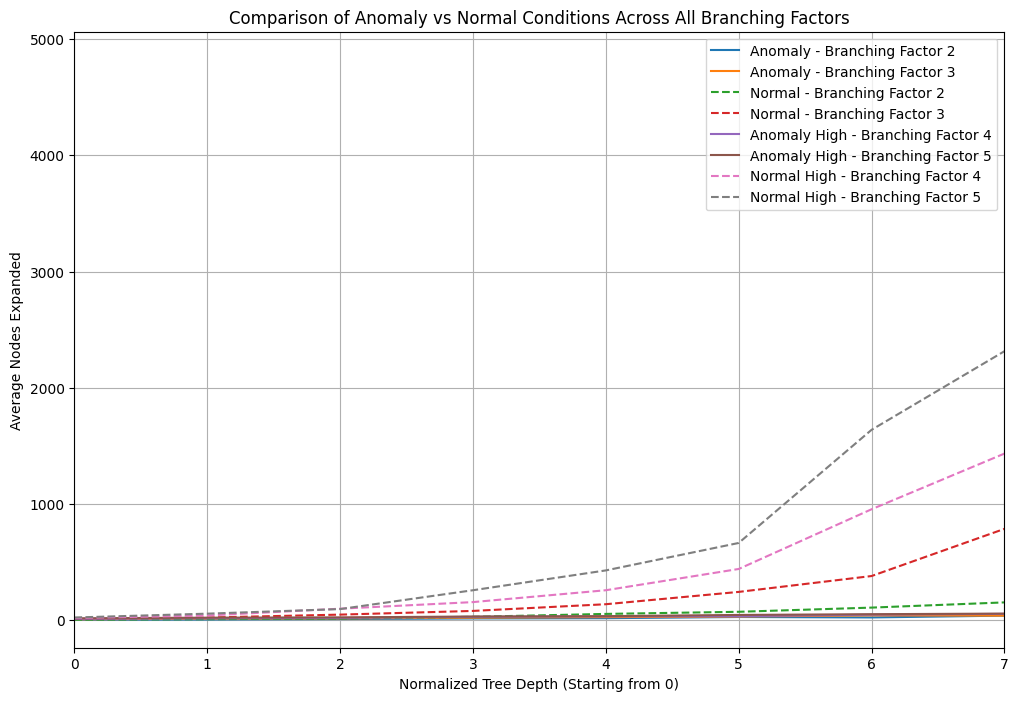

In [12]:

# Define the number of points to plot (optional, here we plot all available points)
n_points = min(df_anomaly.shape[1], df_normal.shape[1], df_anomaly_high.shape[1], df_normal_high.shape[1])

# Function to plot all data together with x-axis starting from 0 and limited to 7
def plot_all_together(df_anomaly, df_normal, df_anomaly_high, df_normal_high, n_points):
    plt.figure(figsize=(12, 8))
    
    # Plot for anomaly (low branching factors)
    for branching_factor in df_anomaly.index:
        nodes_expanded = df_anomaly.loc[branching_factor].dropna()[-n_points:]
        depths = df_anomaly.columns.astype(int)[-len(nodes_expanded):]
        depths_normalized = depths - depths.min()
        plt.plot(depths_normalized, nodes_expanded, label=f'Anomaly - Branching Factor {branching_factor}')
    
    # Plot for normal (low branching factors)
    for branching_factor in df_normal.index:
        nodes_expanded = df_normal.loc[branching_factor].dropna()[-n_points:]
        depths = df_normal.columns.astype(int)[-len(nodes_expanded):]
        depths_normalized = depths - depths.min()
        plt.plot(depths_normalized, nodes_expanded, linestyle='--', label=f'Normal - Branching Factor {branching_factor}')
    
    # Plot for anomaly (high branching factors)
    for branching_factor in df_anomaly_high.index:
        nodes_expanded = df_anomaly_high.loc[branching_factor].dropna()[-n_points:]
        depths = df_anomaly_high.columns.astype(int)[-len(nodes_expanded):]
        depths_normalized = depths - depths.min()
        plt.plot(depths_normalized, nodes_expanded, label=f'Anomaly High - Branching Factor {branching_factor}')
    
    # Plot for normal (high branching factors)
    for branching_factor in df_normal_high.index:
        nodes_expanded = df_normal_high.loc[branching_factor].dropna()[-n_points:]
        depths = df_normal_high.columns.astype(int)[-len(nodes_expanded):]
        depths_normalized = depths - depths.min()
        plt.plot(depths_normalized, nodes_expanded, linestyle='--', label=f'Normal High - Branching Factor {branching_factor}')
    
    plt.xlabel('Normalized Tree Depth (Starting from 0)')
    plt.ylabel('Average Nodes Expanded')
    plt.title('Comparison of Anomaly vs Normal Conditions Across All Branching Factors')
    plt.xlim(0, 7)  # Set x-axis range from 0 to 7
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot all data together with x-axis starting from 0 and limited to 7
plot_all_together(df_anomaly, df_normal, df_anomaly_high, df_normal_high, n_points)